### **Outlier Detection and Removal using Quantile (Percentile) Method**

* Outliers in real-world datasets often represent important events, such as fraudulent transactions, VIP customers, or data entry errors. 

* It's crucial for a data scientist to identify and handle them appropriately before building predictive models. 

* In this notebook, we'll detect and remove outliers in a retail customer spending dataset using Quantile (Percentile) Method.

* We will use a step-by-step process that emphasizes **visualization** as the first step to confirm the presence of outliers, followed by a systematic approach to handle them using quantiles.

### Step 1: Import Libraries and Load the Dataset

* We will begin by importing the necessary libraries: `pandas` for data manipulation and `matplotlib` and `seaborn` for visualization. 

* We'll then load our dataset (`customer_spending.csv`), which simulates customer spending at a retail store.

* We'll explore the dataset and display the basic statistics.

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('customer_spending.csv')

# Display the first few rows and summary statistics
df.head()

,customer_id,spending_amount
0,Cust_1,164
1,Cust_2,145
2,Cust_3,169
3,Cust_4,195
4,Cust_5,142


In [3]:
# Descriptive statistics for spending_amount
df['spending_amount'].describe()

count     205.000000
mean      156.653659
std        93.202037
min         5.000000
25%       128.000000
50%       150.000000
75%       165.000000
max      1200.000000
Name: spending_amount, dtype: float64

### Step 2: Visualize the Data to Identify Outliers

* Visualization is key for understanding the data's distribution. 

* A *box plot* is an excellent tool for visually identifying outliers, as they are plotted as individual points outside the "whiskers." 

* A *histogram* can also reveal if a feature's distribution is skewed by extreme values.

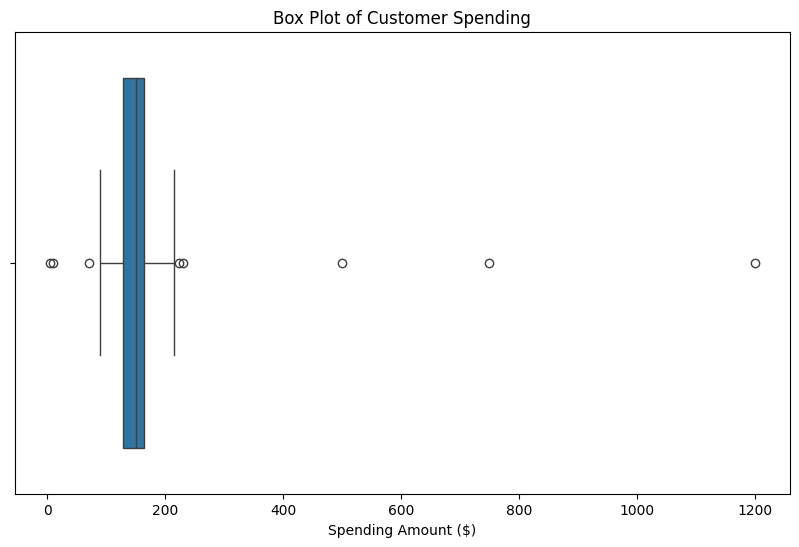

In [4]:
# Create a box plot to visualize outliers in spending_amount
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['spending_amount'])
plt.title('Box Plot of Customer Spending')
plt.xlabel('Spending Amount ($)')
plt.show()

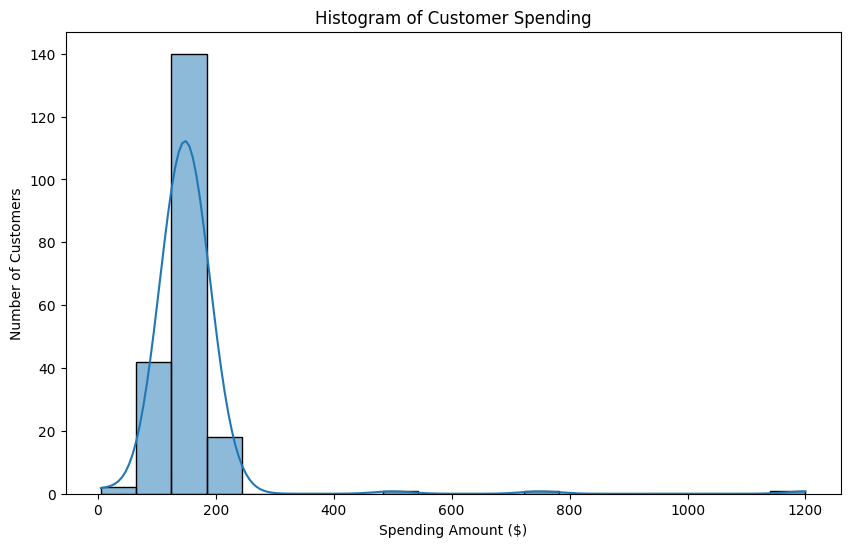

In [5]:
# Create a histogram to see the distribution of spending
plt.figure(figsize=(10, 6))
sns.histplot(df['spending_amount'], bins=20, kde=True)
plt.title('Histogram of Customer Spending')
plt.xlabel('Spending Amount ($)')
plt.ylabel('Number of Customers')
plt.show()

### Step 3: Detect Outliers using Quantiles

* Once we have visually confirmed the outliers, we can use a programmatic approach to detect them. 

* We will use the **quantile method**, which defines a numerical range based on percentiles. 

* In this case, we'll identify any customers whose spending falls below the 5th percentile or above the 95th percentile.

In [6]:
# Calculate the 5th and 95th percentiles for the spending_amount
lower_threshold = df['spending_amount'].quantile(0.05)
upper_threshold = df['spending_amount'].quantile(0.95)

In [7]:
# Lower threshold (5th percentile)
lower_threshold

np.float64(103.2)

In [8]:
# Upper threshold (95th percentile)
upper_threshold

np.float64(196.79999999999998)

In [9]:
print(f"Lower threshold (5th percentile): ${lower_threshold:.2f}")
print(f"Upper threshold (95th percentile): ${upper_threshold:.2f}")

Lower threshold (5th percentile): $103.20
Upper threshold (95th percentile): $196.80


### Step 4: Handle Outliers and Re-visualize

* After identifying the outliers, we can choose to remove them to create a cleaner dataset. 

* We will create a new DataFrame that excludes these data points. 

* Finally, we'll create a new box plot to confirm that our outlier removal was successful.

In [11]:
# Display the data points considered as outliers based on the thresholds
outliers = df[(df['spending_amount'] < lower_threshold) | (df['spending_amount'] > upper_threshold)]
outliers 


,customer_id,spending_amount
6,Cust_7,197
13,Cust_14,92
14,Cust_15,98
31,Cust_32,205
37,Cust_38,91
49,Cust_50,97
74,Cust_75,71
79,Cust_80,90
106,Cust_107,206
110,Cust_111,92


In [12]:
# Create a new DataFrame with outliers removed
df_cleaned = df[(df['spending_amount'] >= lower_threshold) & (df['spending_amount'] <= upper_threshold)]
df.head()

,customer_id,spending_amount
0,Cust_1,164
1,Cust_2,145
2,Cust_3,169
3,Cust_4,195
4,Cust_5,142


In [14]:
# Shape comparison before and after outlier removal
df.shape, df_cleaned.shape

((205, 2), (183, 2))

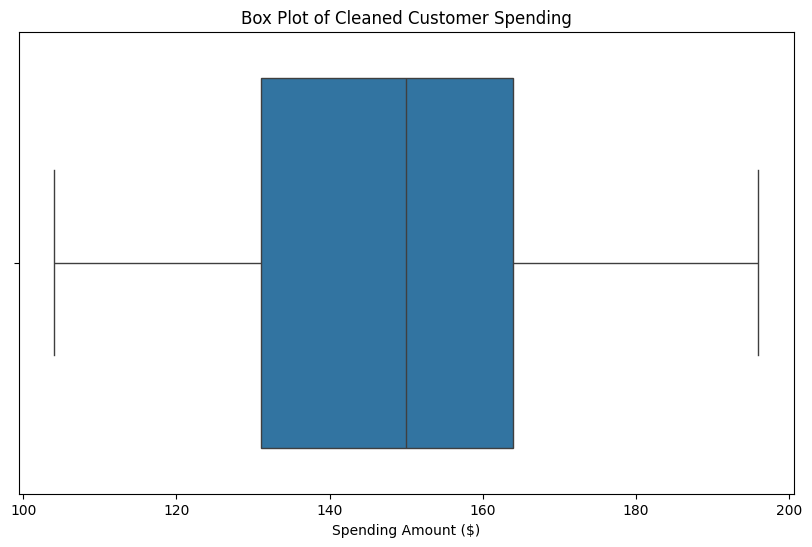

In [15]:
# Create a box plot of the cleaned data
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['spending_amount'])
plt.title('Box Plot of Cleaned Customer Spending')
plt.xlabel('Spending Amount ($)')
plt.show()

In [16]:
# Descriptive statistics for the cleaned data
df_cleaned.describe()

,spending_amount
count,183.000000
mean,148.229508
std,22.741785
min,104.000000
25%,131.000000
50%,150.000000
75%,164.000000
max,196.000000


### Summary

* In this notebook, we've successfully detected and removed outliers:

  * We used a box plot and histogram to visually identify a handful of customers with unusually high or low spending amounts.
  * We programmatically identified these customers by setting a range based on the 5th and 95th percentiles.
  * We successfully removed the outliers and created a new, cleaner dataset.

* The final box plot and descriptive statistics for the cleaned data show a much tighter distribution, indicating that the extreme values have been successfully handled.

---

#### **Exercise: Outlier Detection and Removal in Student Test Scores**

#### Problem Statement

* Your task is to analyze a dataset of student test scores. 

* As a data analyst, you need to identify and handle any potential outliers in the `test_score` column. 

* These outliers could represent exceptional student performance or, conversely, a lack of participation or a major misunderstanding of the test material. 

#### Necessary Steps

1.  *Import Libraries and Load Dataset*: Load the provided `student_test_scores.csv` file into a pandas DataFrame.
2.  *Visualize the Data*: Use visualization tools like a box plot and a histogram to inspect the distribution of the test scores and identify any outliers.
3.  *Detect Outliers using Quantiles*: Programmatically detect outliers by defining upper and lower thresholds based on percentiles.
4.  *Remove Outliers*: Create a new DataFrame that removes the identified outliers.
5.  *Compare Original and Cleaned Data*: Compare the descriptive statistics and visualizations of the original and cleaned datasets to understand the impact of your work.

---

* Donwload Dataset:  [student_test_scores.csv](https://raw.githubusercontent.com/prakash-ukhalkar/ML/refs/heads/main/07_Feature_Engineering_ML/01_Exercise_Feature_Engineering_ML/student_test_scores.csv)
* Solution : [Exercise - Outlier Detection and Removal in Student Test Scores (Using Percentiles)](https://github.com/prakash-ukhalkar/ML/blob/main/07_Feature_Engineering_ML/01_Exercise_Feature_Engineering_ML/01_Exercise_Outlier_Detection_Removal_Quantile_ML.ipynb)

---